# Statistics and Probability
## First Block

We have the following p.d.f. $\frac{d\Gamma}{d\cos\theta}$ with a parameter $P_{\mu} \in [-1,1]$

$$
\frac{d\Gamma}{d\cos\theta}=\frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big)
$$

The variable $\theta$ represents the angle between the muon and electron polarizations, thus $\theta \in [-\pi,0]$ which means that $\cos \theta \in [-1,1]$. It can be checked that this function fulfills all the conditions in order to be a p.d.f. 

#### 1. Positive Semi-Defined Function
Both $P_{\mu}$ and $\cos \theta$ are constrained in the interval $[-1,1]$. Therefore:

\begin{eqnarray}
\frac{1}{2}\big(1-\frac{1}{3}\big) \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{1}{2}\big(1-\frac{-1}{3}\big) \\
\frac{1}{3} \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{2}{3}
\end{eqnarray}


#### 2. Normalized Function
To simplify the calculations, we will use $\cos \theta$ as our variable. 

\begin{eqnarray}
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) d\cos\theta = \frac{1}{2}\int_{-1}^{1} d\cos\theta -\frac{1}{6}P_{\mu}\int_{-1}^{1} \cos\theta d\cos\theta = \Big[\frac{1}{2}\cos\theta-\frac{1}{12}P_{\mu}\cos^2\theta \Big]_{-1}^{1}=\frac{1}{2}(1-(-1))-\frac{1}{12}P_{\mu}(1-(-1)^2)=1
\end{eqnarray}


#### 3. Plot of the PDF
Let's now plot the normalized differential probability density function $\frac{d\Gamma}{d\cos\theta}$. First, we will initialize several Python libraries which we be useful during this problem set. 

In [2]:
# sets the plots to be embedded in the notebook
%matplotlib inline 

# Import useful python libraries 
import numpy as np # library to work with arrays
import matplotlib.pyplot as plt # plotting library (all weird commands starting with plt., ax., fig. are matplotlib
                                # they are not important, the define plots and set labels, axis...)
import random # (pseudo-)random numbers generation
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)

[Mariona]: We could eliminate the "set different parameters for plots" section (shown below) for simplification  purposes. You'll see how the code works just as fine without it than with it, and because it's a big chunk   that doesn't really do much, I thought we could get rid of it :) Of course feel free to leave it here if you prefer it! as of now i've commented it with the "'''" command so that you can try how the code works w/o this section. let me know what you think! 

In [2]:
'''
# Set diferent parameters for plots 
SIZE=18
plt.rc('font', size=SIZE) #controls default text sizes
plt.rc('axes', titlesize=SIZE) #fontsize of the axes title
plt.rc('axes', labelsize=SIZE) #fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('legend', fontsize=SIZE) #legend fontsize
plt.rc('figure', titlesize=SIZE) #size of the figure title
plt.rc('figure', figsize=(12,8)) #size of the figure
plt.rc('lines', color='b')
plt.rc('axes', prop_cycle=plt.cycler(color=['k','g','r','b','c','m','y'])) # set the plot color cycler
'''

"\n# Set diferent parameters for plots \nSIZE=18\nplt.rc('font', size=SIZE) #controls default text sizes\nplt.rc('axes', titlesize=SIZE) #fontsize of the axes title\nplt.rc('axes', labelsize=SIZE) #fontsize of the x any y labels\nplt.rc('xtick', labelsize=SIZE) #fontsize of the tick labels\nplt.rc('ytick', labelsize=SIZE) #fontsize of the tick labels\nplt.rc('legend', fontsize=SIZE) #legend fontsize\nplt.rc('figure', titlesize=SIZE) #size of the figure title\nplt.rc('figure', figsize=(12,8)) #size of the figure\nplt.rc('lines', color='b')\nplt.rc('axes', prop_cycle=plt.cycler(color=['k','g','r','b','c','m','y'])) # set the plot color cycler\n"

Define the $\frac{d\Gamma}{d\cos\theta}$ function, using the angle $\theta$ and the muon polarization $P_{\mu}$ as input variables:

In [3]:
def gamma(cost,Pmu):
    dg=.5*(1-Pmu*cost/3)
    return dg

We are now ready to plot the $d\Gamma$ probability density function.

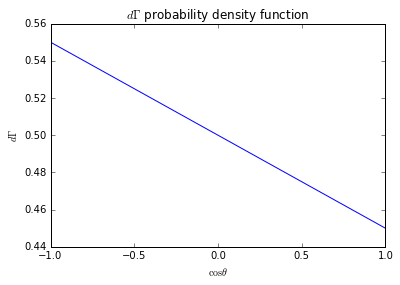

In [4]:
# Define parameters
Pmu=0.3
# Define plot variables
cost=np.linspace(-1,1,201)
dG=gamma(cost,Pmu)
# Plot
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(cost,dG)
ax.set_title('$d\Gamma$ probability density function')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')

[Mariona]: I've never really used the ax. command because it increases the 
complexity of the code quite significantly. I've written below how i'd personally plot the figure, which consists on using the regular plt. command. If you try it out, you'll see we get the same results!: 

In [1]:
'''
fig = plt.figure(1)
plt.plot(cost, dG)
plt.title('$d\Gamma$ probability density function')
plt.xlabel(r'$\cos\theta$')
plt.ylabel('$d\Gamma$')
'''

"\nfig = plt.figure(1)\nplt.plot(cost, dG)\nplt.title('$d\\Gamma$ probability density function')\nplt.xlabel(r'$\\cos\theta$')\nplt.ylabel('$d\\Gamma$')\n"

# 2. Build a Monte Carlo able to generate this PDF 

[Oriol]: Nota sobre python y los bucles: Python es muy bonito y simple, pero se le atragantan un poco los bucles. Por suerte, numpy esta hecho en C, cosa que agiliza muchísimo la ejecución. Tanto en el try-teject como en el inverse function hay una comparación. Teneis que descomentar el timeit para ver la comparación de tiempo y comentarlo para poderlo ejecutar correctamente.

### Try-Reject p.d.f generation

We will construct our Monte Carlo with the Try-Reject method.

(Without using Numpy explicitly):

In [67]:
#%%timeit # returns the elapsed time when executing the cell, it executes the cell more than once, 
         # thus, it should only be uncommented when desired
# Montecarlo try-reject
N=10000000
Xi1=np.empty(N)

#define fmax
if Pmu>0:
    fmax=gamma(-1,Pmu)
else:
    fmax=gamma(1,Pmu)
i=0

while i<N:
    r=random.random()
    x=-1+2*r
    y=random.random()*fmax
    if gamma(x,Pmu)>=y:
        Xi1[i]=x
        i+=1

Using Numpy:

[Mariona]: Numpy simplifica/optimiza muchísimo el código. Yo optaría por hacer esta segunda versión.

In [68]:
#%%timeit
N=10000000
x=-1+2*np.random.random(2*N) #notad que aquí genero más numeros aleatorios que en el caso del bucle 
                             #y aún así és 6 veces más rápido. 
                            
y=fmax*np.random.random(2*N)
Xi2=x[y<=gamma(x,Pmu)][:N]

Plot the results of the Try-Reject Method:

(0.4, 0.6)

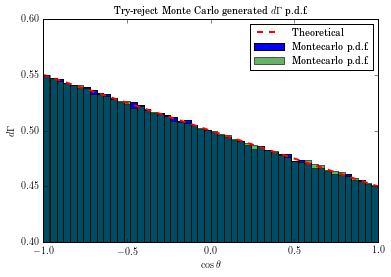

In [70]:
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xi1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xi2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Try-reject Monte Carlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Inverse function p.d.f. generation
To generate a p.d.f via the inverse method we need the inverse of the cumulative function. The cumulative function was found in the first question while checking that the p.d.f. was normalized, thus:

$$
F(\cos\theta)=\Big[\frac{1}{2}z-\frac{1}{12}P_{\mu}z^2 \Big]_{-1}^{\cos\theta}=\frac{1}{2}(\cos\theta+1)-\frac{1}{12}P_{\mu}(\cos^2\theta-1) 
$$

$$
\frac{P_{\mu}}{12}\cos^2\theta-\frac{\cos\theta}{2}+r-\frac{1}{2}-\frac{P_{\mu}}{12}=0 \quad \rightarrow \quad \cos\theta=\frac{3}{P_{\mu}}\pm \frac{6}{P_{\mu}}\sqrt{\frac{1}{4}-\frac{P_{\mu}}{3}(r-\frac{1}{2}-\frac{P_{\mu}}{12})}
$$

In [5]:
# Inverse function
def Finv(r,Pmu):
    #cost=(1.5-3.*np.sqrt(.25-2./3.*Pmu*(r-(3.+Pmu)/6.)))/Pmu
    cost=(3.-6.*np.sqrt(.25-Pmu/3.*(r-.5-Pmu/12)))/Pmu
    return cost

(without numpy explicitely)

In [7]:
%%timeit
N=10000000
Xinv1=np.empty(N)
for i in xrange(N):
    r=random.random()
    Xinv1[i]=Finv(r,Pmu)

1 loop, best of 3: 18.3 s per loop


(with numpy magic)

In [9]:
%%timeit 
# Montecarlo inverse function
N=10000000
r=np.random.random(N)
Xinv2=Finv(r,Pmu)

1 loop, best of 3: 454 ms per loop


[Oriol] The execution time of the code without using numpy own methods is 18 seconds, whereas knowing numpy reduces it to 0.45 seconds (results with my computer with many things opened)

(0.4, 0.6)

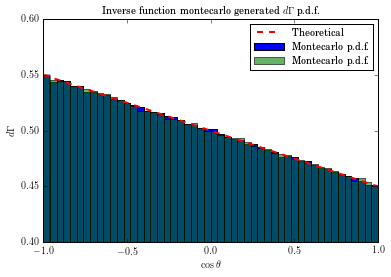

In [74]:
#Plot for the inverse function method
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xinv1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xinv2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Inverse function montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Estimate distribution parameters
In this section, the rellevant parameters of the p.d.f. will be estimated from the montecarlo generated sample. To be able to compare this values, the theoretical values will also be obtained:

$$
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) \cos\theta d\cos\theta = \Big[\frac{\cos^2\theta}{4}-\frac{P_{\mu}}{6}\frac{\cos^3\theta}{3}\Big]_{-1}^{1}=\frac{-P_{\mu}}{9}
$$

In [75]:
mu=np.mean(Xi1)
sigma=np.std(Xi1) # equivalente a np.sqrt(np.var(Xi1))
skewness=stat.skew(Xi1)
kurtosis=stat.kurtosis(Xi1)

print 'The try-reject montecarlo generated distribution has:\nmean = %.6f,\n\
sigma = %.6f,\nskewness = %.6f\nand kurtosis = %.6f' %(mu, sigma, skewness, kurtosis)

The try-reject montecarlo generated distribution has:
mean = -0.033837,
sigma = 0.576352,
skewness = 0.070684
and kurtosis = -1.191796


# Part 3
The $\frac{d\Gamma}{d\cos\theta}$ mean depends on the polarisation $P_{\mu}$ in a simple manner: mean = $P_{\mu}$/9. 

### 3.1. Show that the Monte Carlo predicts this dependency by changing the value of $P_{\mu}$

### 3.2. What is the variance of the parameter $P_{\mu}$? Compute it numerically using Monte Carlo techniques for a given $P_{\mu}$ value.

# Part 4
Generate a continuous series of N events using the Monte Carlo and compute the mean of the distribution and the estimated $P_{\mu}$ as 9*mean. 

### 4.1. Show that the $P_{\mu}$ tends to the tru evalue as predicted by the law of large numbers